## Use OverPy to collect POI data

In [1]:
import overpy

In [2]:
CITY = 'New Delhi'

query = f'''[out:json];
area[name="{CITY}"];
node["amenity"](area);
out; '''

In [3]:
api = overpy.Overpass()
res = api.query(query)

In [4]:
nodes = []
for node in res.nodes:
    if node.tags:
        nodes.append({
            'id': node.id,
            'lon': float(node.lon),
            'lat': float(node.lat),
            'amenity': node.tags['amenity']
        })
nodes

[{'id': 248852574, 'lon': 77.1518947, 'lat': 28.533492, 'amenity': 'cafe'},
 {'id': 248852583, 'lon': 77.152001, 'lat': 28.5336472, 'amenity': 'bank'},
 {'id': 266442982, 'lon': 77.164493, 'lat': 28.5573088, 'amenity': 'cinema'},
 {'id': 266443204, 'lon': 77.1645488, 'lat': 28.5578459, 'amenity': 'bank'},
 {'id': 266443228,
  'lon': 77.1637622,
  'lat': 28.5573346,
  'amenity': 'fast_food'},
 {'id': 271335768, 'lon': 77.1378574, 'lat': 28.489358, 'amenity': 'school'},
 {'id': 277420968, 'lon': 77.1070198, 'lat': 28.5336932, 'amenity': 'fuel'},
 {'id': 279161182, 'lon': 77.1570574, 'lat': 28.525047, 'amenity': 'bank'},
 {'id': 279161187, 'lon': 77.1561648, 'lat': 28.5262695, 'amenity': 'fuel'},
 {'id': 301037300, 'lon': 77.1850155, 'lat': 28.5499496, 'amenity': 'parking'},
 {'id': 308894803,
  'lon': 77.2299189,
  'lat': 28.6069461,
  'amenity': 'restaurant'},
 {'id': 309861440, 'lon': 77.185421, 'lat': 28.5983754, 'amenity': 'school'},
 {'id': 312102918, 'lon': 77.2089741, 'lat': 28.57

## Load Data to Pandas Dataframe

In [5]:
# import geopandas as gpd

# gdf = gpd.read_file('NewDelhi.geojson')
# gdf

In [6]:
# gdf.columns

In [7]:
# gdf = gdf[['id','amenity', 'name', 'geometry']]
# gdf

In [8]:
# point_collection = gdf.geometry

In [9]:
# convex_hull_polygon = point_collection.convex_hull
# convex_hull_polygon

In [10]:
import pandas as pd

df = pd.DataFrame(nodes)
df

,id,lon,lat,amenity
0,248852574,77.151895,28.533492,cafe
1,248852583,77.152001,28.533647,bank
2,266442982,77.164493,28.557309,cinema
3,266443204,77.164549,28.557846,bank
4,266443228,77.163762,28.557335,fast_food
...,...,...,...,...
968,6908305667,77.184036,28.570453,drinking_water
969,6918479553,77.216821,28.590440,fountain
970,6918479554,77.216761,28.590677,fountain
971,6918479556,77.216881,28.590228,fountain


### Data Cleaning

In [11]:
df.dropna(inplace=True)
df

,id,lon,lat,amenity
0,248852574,77.151895,28.533492,cafe
1,248852583,77.152001,28.533647,bank
2,266442982,77.164493,28.557309,cinema
3,266443204,77.164549,28.557846,bank
4,266443228,77.163762,28.557335,fast_food
...,...,...,...,...
968,6908305667,77.184036,28.570453,drinking_water
969,6918479553,77.216821,28.590440,fountain
970,6918479554,77.216761,28.590677,fountain
971,6918479556,77.216881,28.590228,fountain


In [12]:
import folium


city_map = folium.Map([df.loc[0].lat, df.loc[0].lon], zoom_start=11)

for _, row in df.iterrows():
    folium.CircleMarker([row['lat'], row['lon']],
                        radius=1,
                        popup=row['amenity'],
                       ).add_to(city_map)

city_map

In [13]:
df['amenity'].unique()

array(['cafe', 'bank', 'cinema', 'fast_food', 'school', 'fuel', 'parking',
       'restaurant', 'fire_station', 'pharmacy', 'post_box', 'hospital',
       'toilets', 'atm', 'club', 'bus_station', 'embassy',
       'Netaji Nagar Market', 'Suvidha Market, Netaji Nagar',
       'place_of_worship', 'college', 'police', 'Ayurvedic Hospital',
       'House', 'public_building', 'marketplace', 'library', 'bar',
       'kindergarten', 'taxi', 'waste_basket', 'bench', 'doctors',
       'bureau_de_change', 'pub', 'fast_food;bar', 'post_office',
       'theatre', 'community_centre', 'courthouse', 'car_wash',
       'food_court', 'fountain', 'veterinary', 'training',
       'drinking_water', 'bicycle_parking', 'bicycle_rental',
       'vending_machine', 'money_transfer', 'car_rental', 'telephone',
       'waste_disposal', 'bicycle_repair_station', 'nightclub', 'dentist',
       'arts_centre', 'music_school', 'internet_cafe', 'coworking_space',
       'charging_station', 'shelter', 'conference_centr

In [14]:
commerical_amenities = [
    'cafe', 'bank', 'cinema', 'fast_food', 'school', 'parking','restaurant', 'hospital', 'club', 'bus_station', \
    'public_building', 'marketplace', 'library', 'bar', 'taxi', 'pub', 'fast_food;bar', 'post_office', 'theatre',\
    'community_centre', 'courthouse', 'food_court', 'nightclub', 'dentist', 'arts_centre', 'music_school', \
    'internet_cafe', 'coworking_space' 
]

In [15]:
df = df.loc[df['amenity'].isin(commerical_amenities)]
df

,id,lon,lat,amenity
0,248852574,77.151895,28.533492,cafe
1,248852583,77.152001,28.533647,bank
2,266442982,77.164493,28.557309,cinema
3,266443204,77.164549,28.557846,bank
4,266443228,77.163762,28.557335,fast_food
...,...,...,...,...
950,6853697488,77.163803,28.557183,bank
951,6853697490,77.163984,28.558390,bank
952,6853697495,77.164017,28.558173,bank
953,6853697496,77.164456,28.557856,cafe


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 966
Data columns (total 4 columns):
id         414 non-null int64
lon        414 non-null float64
lat        414 non-null float64
amenity    414 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 16.2+ KB


In [17]:
city_map = folium.Map([df.loc[0].lat, df.loc[0].lon], zoom_start=11)

for _, row in df.iterrows():
    folium.CircleMarker([row['lat'], row['lon']],
                        radius=1,
                        popup=row['amenity'],
                       ).add_to(city_map)

city_map

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
coor_t = sc.fit_transform(df[['lat', 'lon']])

In [19]:
from hdbscan import HDBSCAN
import numpy as np

model = HDBSCAN(metric='haversine', min_cluster_size=5)

model.fit(np.radians(coor_t))

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='eom',
        core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='haversine', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

In [20]:
np.radians(coor_t)

array([[-3.63331640e-02, -1.69405900e-02],
       [-3.62502013e-02, -1.68945339e-02],
       [-2.36018021e-02, -1.14821864e-02],
       [-2.33146933e-02, -1.14580102e-02],
       [-2.35880106e-02, -1.17988165e-02],
       [-5.99251632e-02, -2.30224620e-02],
       [-4.08474712e-02, -1.47037723e-02],
       [-2.75356908e-02, -2.59050350e-03],
       [ 2.93200715e-03,  1.68645722e-02],
       [-1.64949344e-03, -2.41481450e-03],
       [-3.34064283e-02, -1.64967099e-02],
       [-1.81809172e-03, -4.35129283e-03],
       [-1.95205091e-03, -4.39942858e-03],
       [-2.00249420e-02, -1.94217880e-05],
       [-4.74060447e-03, -2.97612073e-02],
       [ 3.62382673e-03, -2.35355346e-02],
       [-2.77606566e-03, -5.75962101e-03],
       [ 1.79777199e-02,  1.24343500e-02],
       [ 1.67847026e-02,  1.31083805e-02],
       [ 1.65615264e-02,  1.30934329e-02],
       [ 1.62259869e-02,  1.29131513e-02],
       [ 1.61000995e-02,  1.27458243e-02],
       [ 1.72729641e-02,  1.19741792e-02],
       [ 1.

In [21]:
clusters = model.labels_
set(clusters)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

In [22]:
clusters

array([ 3,  3, 14, 14, 14, -1,  3, -1,  6,  7,  3,  7,  7, 18, -1, -1,  7,
       13, 13, 13, 13, 13, 13, 13, 13, 13, -1, -1, -1, -1,  9, 18, -1, -1,
       16, 16, 18, 18, -1,  8,  7, 13, -1, 13, 10, 12, 12,  4,  5, 18, -1,
       -1, -1,  4, 14, 14, 14, 14,  4, 13, 13, 18, 13, 13, -1,  0,  0,  0,
        0,  0,  0, 13, 18, 11, 14, 14, 14,  5,  5,  5,  5,  5, -1, 13, 17,
       -1, 13, -1, -1, -1, 13, -1, -1, -1, -1,  0, -1, 13,  0,  0, 13, 13,
        9, 13, -1,  7, 13, 13,  3,  3,  3,  3,  9,  9,  9,  9, 13, 13, 13,
       10, 13,  8, 13, 13,  8,  8, 17, 17,  9, 18, 18, 17, 17, 17, 18, 13,
       13, 13, 13, 13, 13, 13, 13, -1, 13,  6, -1, -1, 13, -1, 13, 11, 13,
       10, 13, 13, 10, 10, 10, 13, 13, -1,  2,  2,  2,  2, -1,  6,  6, -1,
       13, 13, -1,  6,  7, 13, -1,  1,  8,  0, 13, -1, 10, 16, 16, 13, 13,
       13, 13, 13, 13, 13, 13, 11, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, -1,  3,  6, 13,  4,  7,  7,  7,  7,  7, -1,
       -1, -1, -1, 13, -1

/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


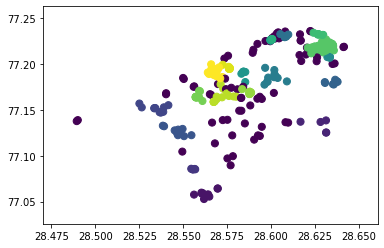

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(df[['lat']],df[['lon']],c=clusters.reshape(-1,1),s=50)
fig.show()

In [24]:
df['cluster'] = clusters
df

/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,lon,lat,amenity,cluster
0,248852574,77.151895,28.533492,cafe,3
1,248852583,77.152001,28.533647,bank,3
2,266442982,77.164493,28.557309,cinema,14
3,266443204,77.164549,28.557846,bank,14
4,266443228,77.163762,28.557335,fast_food,14
...,...,...,...,...,...
950,6853697488,77.163803,28.557183,bank,14
951,6853697490,77.163984,28.558390,bank,14
952,6853697495,77.164017,28.558173,bank,14
953,6853697496,77.164456,28.557856,cafe,14


In [25]:
df = df[df.cluster != -1]
df

,id,lon,lat,amenity,cluster
0,248852574,77.151895,28.533492,cafe,3
1,248852583,77.152001,28.533647,bank,3
2,266442982,77.164493,28.557309,cinema,14
3,266443204,77.164549,28.557846,bank,14
4,266443228,77.163762,28.557335,fast_food,14
...,...,...,...,...,...
950,6853697488,77.163803,28.557183,bank,14
951,6853697490,77.163984,28.558390,bank,14
952,6853697495,77.164017,28.558173,bank,14
953,6853697496,77.164456,28.557856,cafe,14


/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


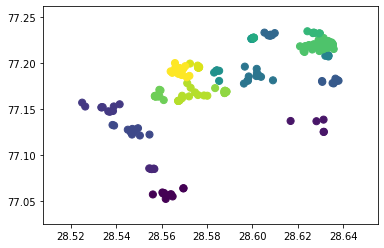

In [26]:
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df[['lat']],df[['lon']],c=np.array(df.cluster).reshape(-1,1),s=50)
fig.show()

In [27]:
city_map = folium.Map([(min(df.lat)+max(df.lat))/2, (min(df.lon)+max(df.lon))/2], zoom_start=11)

for _, row in df.iterrows():
    folium.CircleMarker([row['lat'], row['lon']],
                        radius=1,
                        popup=row['amenity'],
                       ).add_to(city_map)

city_map

In [54]:
df['cluster'].value_counts()

13    159
14     22
18     19
16     14
4      14
7      13
15     12
17     11
3      10
0      10
10      8
6       8
5       8
12      8
9       7
2       6
8       5
11      5
1       5
Name: cluster, dtype: int64

In [60]:
cluster_0 = df[df.cluster == 0]
cluster_0_coor = list(zip(cluster_0.lat, cluster_0.lon))
cluster_0_coor = np.array(cluster_0_coor)

In [62]:
cluster_0_coor.size

20

/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


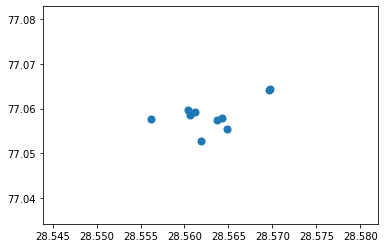

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(cluster_0_coor[:, 0], cluster_0_coor[:, 1],s=50)
fig.show()

In [64]:
from scipy.spatial import ConvexHull

hull = ConvexHull(cluster_0_coor)

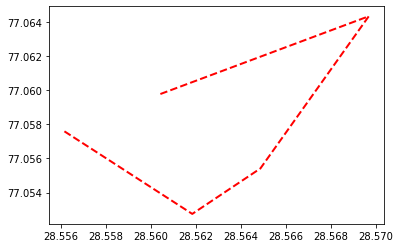

In [65]:
plt.plot(cluster_0_coor[hull.vertices,0], cluster_0_coor[hull.vertices,1], 'r--', lw=2)
# plt.plot(cluster_0_coor[hull.vertices[0],0], cluster_0_coor[hull.vertices[0],1], 'ro')
plt.show()

In [66]:
hull.vertices

array([6, 3, 2, 7, 5], dtype=int32)

In [67]:
hull_coor_lat = list()
hull_coor_lon = list()
for i in hull.vertices:
    hull_coor_lat.append(list(cluster_0_coor[i])[0])
    hull_coor_lon.append(list(cluster_0_coor[i])[1])

In [68]:
hull_coor_lat

[28.5561723, 28.5618497, 28.5648745, 28.5696878, 28.5603703]

In [69]:
hull_coor_lon

[77.057587, 77.0527553, 77.055416, 77.0643221, 77.0597397]

/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


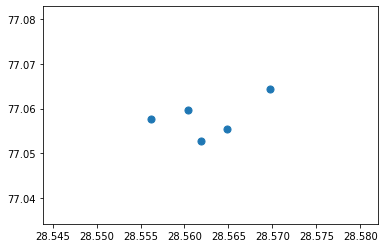

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(hull_coor_lat, hull_coor_lon,s=50)
fig.show()

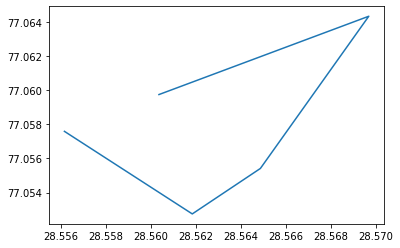

In [71]:
plt.plot(hull_coor_lat, hull_coor_lon)
plt.show()